# A larger example

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2024-03-14 20:02:55.253913: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 20:02:55.256376: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 20:02:55.294694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 20:02:55.954751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Read in insurance dataset
insurance = pd.read_csv("./datasets/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Read in insurance dataset
insurance = pd.read_csv("./datasets/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Let's one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


## Steps to take
1. Create X & y values (features and labels)
2. Create training and test sets
3. Build a neural network

In [5]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis='columns').astype(float)
y = insurance_one_hot["charges"]

In [6]:
# Show X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Show y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [1]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

NameError: name 'tf' is not defined

In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8102.1084 - mae: 8067.9551 


[8205.4345703125, 8034.6689453125]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve a model

We'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but train for longer (200 epochs)
3. change compile parameters

### Model_2

In [12]:
# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13243.0488 - mae: 13245.2246   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13075.9688 - mae: 13078.2188
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12738.3164 - mae: 12740.7158 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12071.5615 - mae: 12074.1973 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10941.6543 - mae: 10944.2607 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9488.1758 - mae: 9490.4727 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8144.4302 - mae: 8145.6553 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7479.9458 - mae: 7480.2749 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7381.7666 - mae: 7381.9810 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7356.9385 - mae: 7357.1831 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7335.1299 - mae: 7335.3931 
Epoch 12/100
34/34 ━━━━━━━━━━━

In [13]:
# Evaluate model 2
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4904.6782 - mae: 4878.0376 


[4872.64697265625, 4739.44384765625]

### Model_3

In [14]:
# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13262.2217 - mae: 13264.3887  
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13118.4551 - mae: 13120.6836
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12833.5518 - mae: 12835.9111
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12263.7305 - mae: 12266.3027 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11260.1016 - mae: 11262.7471 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9869.3701 - mae: 9871.7832   
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8451.5059 - mae: 8452.9893 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7577.3999 - mae: 7577.8369 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7407.8608 - mae: 7408.0601 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7377.7388 - mae: 7377.9541 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7356.9780 - mae: 7357.2075 
Epoch 12/200
34/34 ━━━━━━━━━━━

In [15]:
# Evaluate model_3
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3500.0835 - mae: 3486.0696 


[3489.552978515625, 3419.4833984375]

Text(0.5, 0, 'epochs')

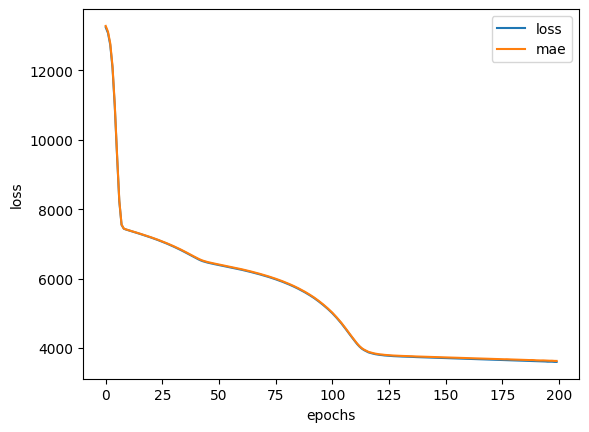

In [16]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### How long neural network should be trained for

It depends on the problem you're working on. TensorFlow has EarlyStoppingComback that stops learning once model stops improving a certain metric.

## Preprocessing data (normalization and standarization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("./datasets/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can use few classes from sklearn

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [19]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [20]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [21]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.
We can now build a neural network with it.

In [22]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Build a model
insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.SGD(),
                               metrics=["mae"])

# 3. Fit the model
history_normal = insurance_model_normal.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13296.7910 - mae: 13298.8965  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13293.4199 - mae: 13295.5273 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13286.2275 - mae: 13288.3398 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13265.3428 - mae: 13267.4727 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13201.2002 - mae: 13203.3848 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13002.0137 - mae: 13004.3672 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12383.5342 - mae: 12386.3496 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10859.6289 - mae: 10862.3037 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9103.7627 - mae: 9105.1123 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8276.8760 - mae: 8277.3164 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8006.4150 - mae: 8006.7217 
Epoch 12/100
34/34 ━━━━━

In [23]:
# Evaluate insurance model with normalized data
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3226.5225 - mae: 3219.1592 


[3198.18701171875, 3161.37060546875]

Text(0.5, 0, 'epochs')

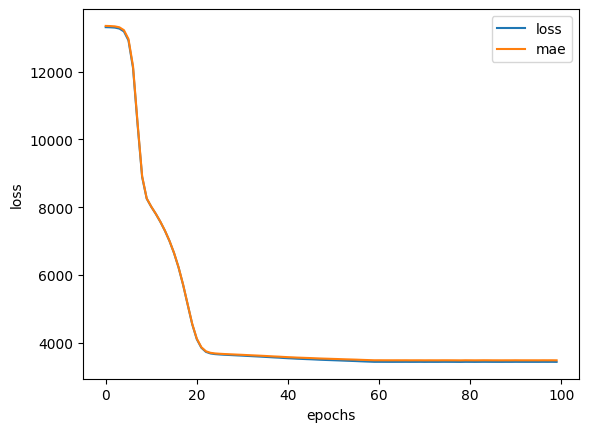

In [24]:
# Plot model training
pd.DataFrame(history_normal.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Insurnace model normalized 2

In [25]:
# 1. Build a model
insurance_model_normal_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_normal_2.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# 3. Fit the model
history_normal_2 = insurance_model_normal_2.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13295.4209 - mae: 13297.5273  
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13288.7861 - mae: 13290.8965
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13271.7734 - mae: 13273.8936
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13234.1240 - mae: 13236.2568 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13165.2051 - mae: 13167.3574 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13053.7930 - mae: 13055.9697 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12888.8086 - mae: 12891.0137 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12660.0117 - mae: 12662.2490 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12357.5762 - mae: 12359.8506 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11973.6816 - mae: 11975.9980 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11515.0000 - mae: 11517.3223 
Epoch 12/200
34/34 ━

In [26]:
# Evaluate the model
insurance_model_normal_2.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3220.9373 - mae: 3213.3872 


[3198.21533203125, 3160.46484375]

Text(0, 0.5, 'loss')

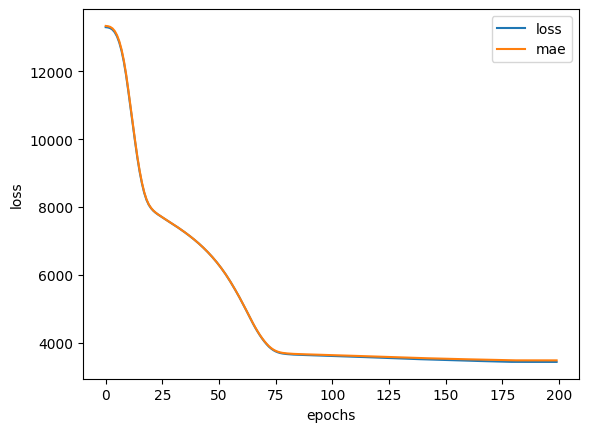

In [27]:
# Plot model training
pd.DataFrame(history_normal_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")